In [1]:
import pandas as pd

import sys
import os
sys.path.append(os.path.abspath("../"))

from scripts.time_series_preprocessing import (
    extract_currency_series,
    rename_columns_and_set_id,
    convert_column_to_datetime,
    convert_column_to_float,
    drop_over_limit_date,
    export_to_parquet
)

from scripts.time_series_visualization import (
    plot_raw_series,
    plot_series_acf,
    plot_series_pacf,
    checks_stationarity
)

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
df_acucar_santos = pd.read_csv("../data/raw/acucar/Indicador Açúcar Cristal - Santos (FOB).csv")
df_acucar_sp = pd.read_csv("../data/raw/acucar/INDICADOR DO AÇÚCAR CRISTAL BRANCO CEPEA-ESALQ - SÃO PAULO.csv")

In [4]:
df_acucar_santos.head()

,Data,À vista R$,À vista US$
0,02/01/2020,"65,4","16,26"
1,03/01/2020,"66,8","16,49"
2,06/01/2020,"68,92","16,99"
3,07/01/2020,"68,85","16,86"
4,08/01/2020,"68,32","16,8"


In [5]:
df_acucar_sp.head()

,Data,À vista R$,À vista US$
0,20/05/2003,"29,65","9,75"
1,21/05/2003,"29,26","9,75"
2,22/05/2003,"28,81","9,66"
3,23/05/2003,"28,35","9,71"
4,26/05/2003,"27,83","9,19"


In [6]:
# Pegar apenas a série BRL
# Verificar/tratar valores nulos
# Verificar/tratar períodos nulos
# Calcular média, mediana, desvio padrão, volatidade
# Analisar autocorrelação ACF/PACF e estacionaridade Dickey-Fuller

## Indicador Açúcar Cristal - Santos (FOB)

In [7]:
df_acucar_santos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Data         1330 non-null   object
 1   À vista R$   1330 non-null   object
 2   À vista US$  1330 non-null   object
dtypes: object(3)
memory usage: 31.3+ KB


In [8]:
df_acucar_santos_brl = extract_currency_series(df_acucar_santos)
df_acucar_santos_brl.head()

,Data,À vista R$
0,02/01/2020,"65,4"
1,03/01/2020,"66,8"
2,06/01/2020,"68,92"
3,07/01/2020,"68,85"
4,08/01/2020,"68,32"


In [9]:
cols_dict_brl = {
    'Data': 'ds',
    'À vista R$': 'y'
}

df_acucar_santos_brl = rename_columns_and_set_id(df_acucar_santos_brl, cols_dict_brl, "ACUCAR_SANTOS")
df_acucar_santos_brl = convert_column_to_datetime(df_acucar_santos_brl, "ds")
df_acucar_santos_brl = convert_column_to_float(df_acucar_santos_brl, "y")

df_acucar_santos_brl.head()

,ds,y,unique_id
0,2020-01-02,65.40,ACUCAR_SANTOS
1,2020-01-03,66.80,ACUCAR_SANTOS
2,2020-01-06,68.92,ACUCAR_SANTOS
3,2020-01-07,68.85,ACUCAR_SANTOS
4,2020-01-08,68.32,ACUCAR_SANTOS


In [10]:
df_acucar_santos_brl.tail()

,ds,y,unique_id
1325,2025-04-30,130.79,ACUCAR_SANTOS
1326,2025-05-02,129.39,ACUCAR_SANTOS
1327,2025-05-05,131.45,ACUCAR_SANTOS
1328,2025-05-06,132.94,ACUCAR_SANTOS
1329,2025-05-07,131.12,ACUCAR_SANTOS


In [11]:
df_acucar_santos_brl = drop_over_limit_date(df_acucar_santos_brl, '01/05/2025', "ds")
df_acucar_santos_brl.tail()

,ds,y,unique_id
1321,2025-04-24,135.20,ACUCAR_SANTOS
1322,2025-04-25,137.06,ACUCAR_SANTOS
1323,2025-04-28,133.83,ACUCAR_SANTOS
1324,2025-04-29,131.98,ACUCAR_SANTOS
1325,2025-04-30,130.79,ACUCAR_SANTOS


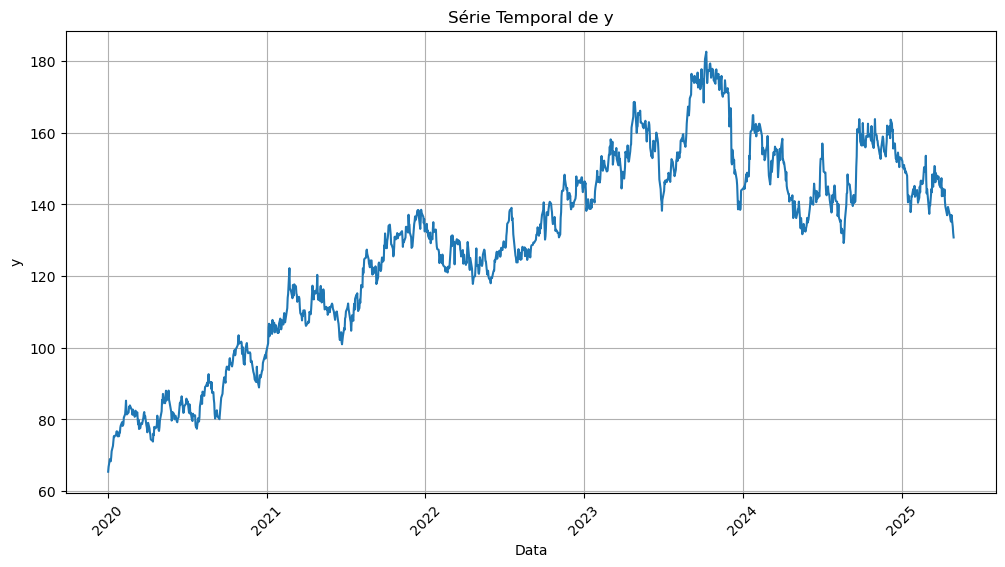

In [12]:
plot_raw_series(df_acucar_santos_brl, "y")

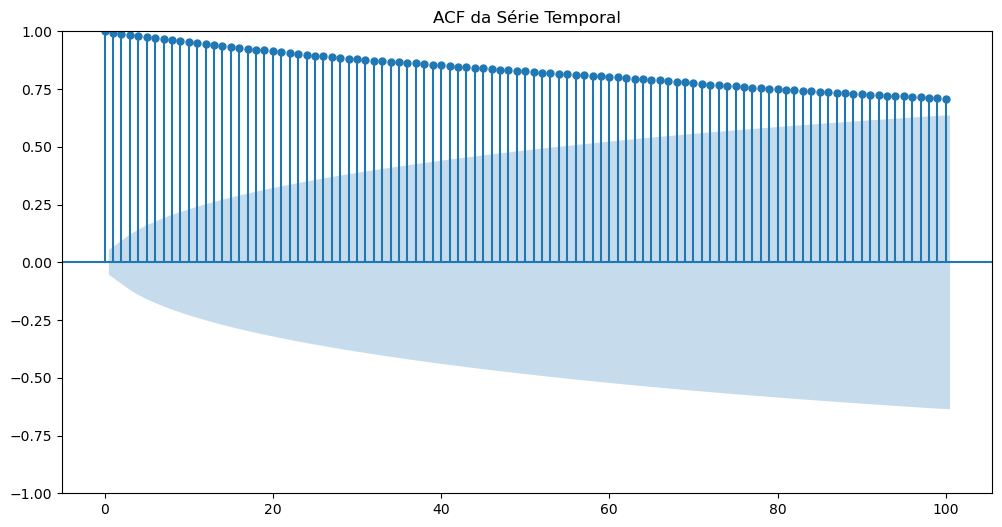

In [13]:
plot_series_acf(df_acucar_santos_brl['y'])

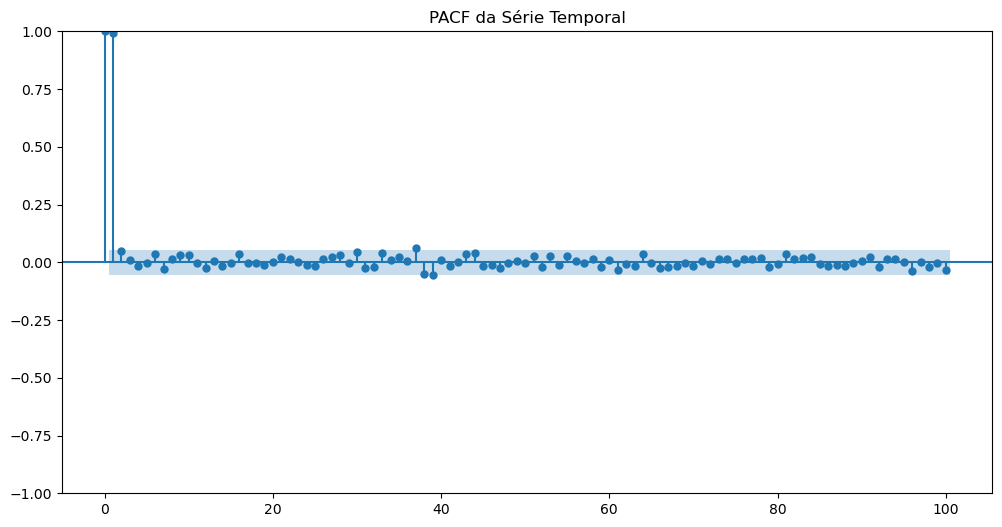

In [14]:
plot_series_pacf(df_acucar_santos_brl['y'])

In [15]:
checks_stationarity(df_acucar_santos_brl['y'])

ADF Statistic: -2.370302839666394
p-value: 0.15029421006548443
Críticos: {'1%': np.float64(-3.4352986582786715), '5%': np.float64(-2.8637254386150706), '10%': np.float64(-2.5679335359525743)}
❌ Série não é estacionária.


In [16]:
export_to_parquet(df_acucar_santos_brl, "../data/acucar/acucar_santos_brl.parquet")

Arquivo salvo em: ../data/acucar/acucar_santos_brl.parquet


## Indicador Açúcar Cristal Branco CEPEA-ESALQ - São Paulo

In [17]:
df_acucar_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5447 entries, 0 to 5446
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Data         5447 non-null   object
 1   À vista R$   5447 non-null   object
 2   À vista US$  5447 non-null   object
dtypes: object(3)
memory usage: 127.8+ KB


In [18]:
df_acucar_sp_brl = extract_currency_series(df_acucar_sp)
df_acucar_sp_brl.head()

,Data,À vista R$
0,20/05/2003,"29,65"
1,21/05/2003,"29,26"
2,22/05/2003,"28,81"
3,23/05/2003,"28,35"
4,26/05/2003,"27,83"


In [19]:
cols_dict_brl = {
    'Data': 'ds',
    'À vista R$': 'y'
}

df_acucar_sp_brl = rename_columns_and_set_id(df_acucar_sp_brl, cols_dict_brl, "ACUCAR_SP")
df_acucar_sp_brl = convert_column_to_datetime(df_acucar_sp_brl, "ds")
df_acucar_sp_brl = convert_column_to_float(df_acucar_sp_brl, "y")

df_acucar_sp_brl.head()

,ds,y,unique_id
0,2003-05-20,29.65,ACUCAR_SP
1,2003-05-21,29.26,ACUCAR_SP
2,2003-05-22,28.81,ACUCAR_SP
3,2003-05-23,28.35,ACUCAR_SP
4,2003-05-26,27.83,ACUCAR_SP


In [20]:
df_acucar_sp_brl.tail()

,ds,y,unique_id
5442,2025-04-30,143.92,ACUCAR_SP
5443,2025-05-02,141.64,ACUCAR_SP
5444,2025-05-05,141.82,ACUCAR_SP
5445,2025-05-06,142.07,ACUCAR_SP
5446,2025-05-07,141.75,ACUCAR_SP


In [21]:
df_acucar_sp_brl = drop_over_limit_date(df_acucar_sp_brl, '01/05/2025', "ds")
df_acucar_sp_brl.tail()

,ds,y,unique_id
5438,2025-04-24,143.62,ACUCAR_SP
5439,2025-04-25,143.81,ACUCAR_SP
5440,2025-04-28,143.04,ACUCAR_SP
5441,2025-04-29,142.84,ACUCAR_SP
5442,2025-04-30,143.92,ACUCAR_SP


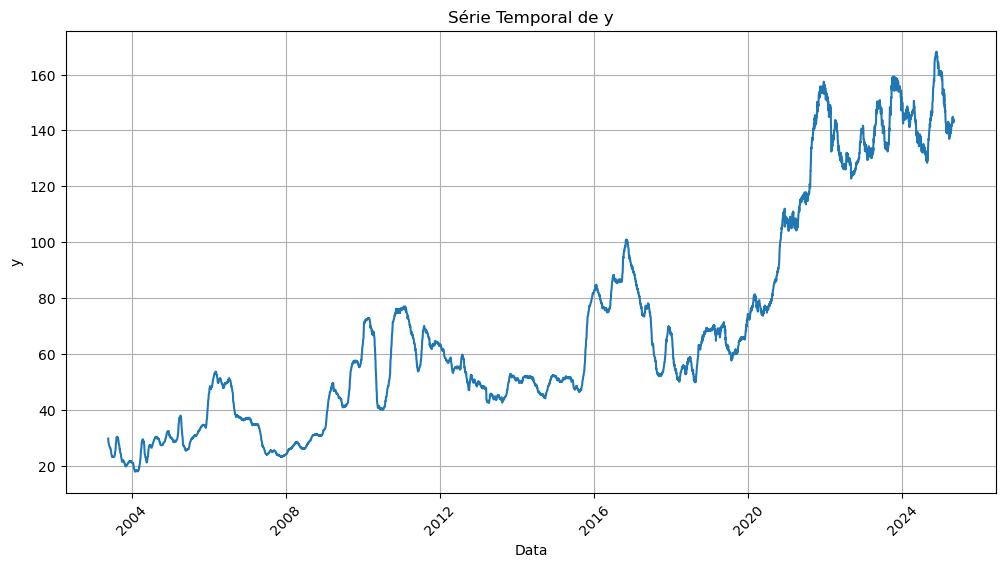

In [22]:
plot_raw_series(df_acucar_sp_brl, "y")

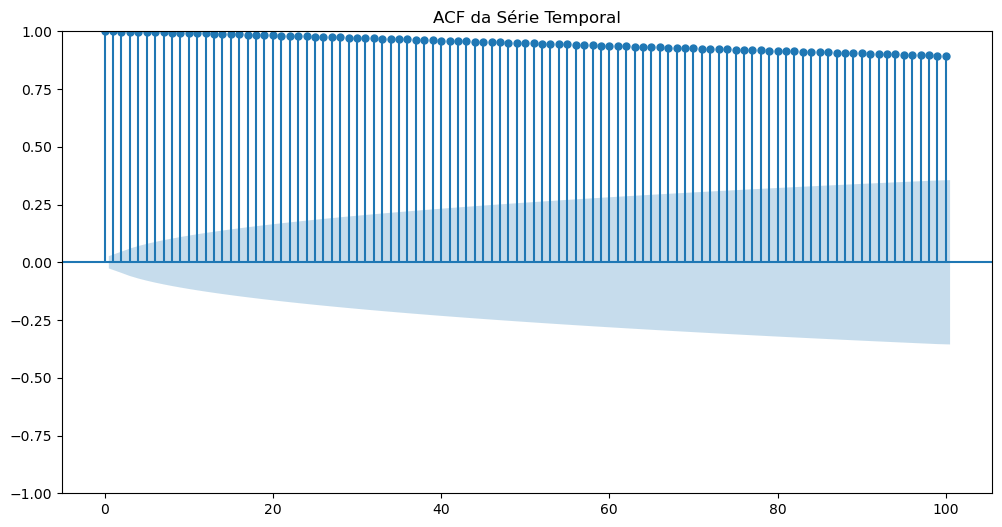

In [23]:
plot_series_acf(df_acucar_sp_brl['y'])

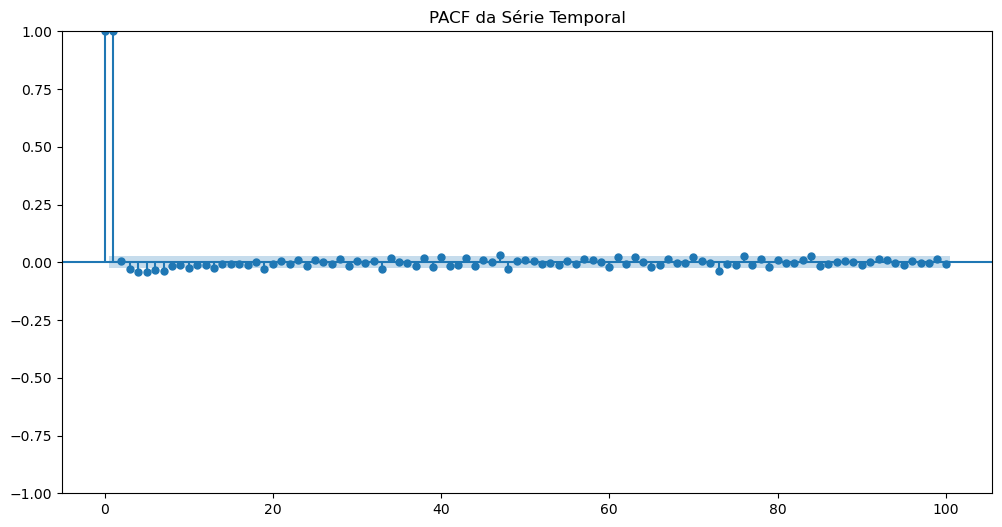

In [24]:
plot_series_pacf(df_acucar_sp_brl['y'])

In [25]:
checks_stationarity(df_acucar_sp_brl['y'])

ADF Statistic: -0.9572083039181833
p-value: 0.768550037170416
Críticos: {'1%': np.float64(-3.431559540776716), '5%': np.float64(-2.862074495126272), '10%': np.float64(-2.5670545108744043)}
❌ Série não é estacionária.


In [26]:
export_to_parquet(df_acucar_sp_brl, "../data/acucar/acucar_sp_brl.parquet")

Arquivo salvo em: ../data/acucar/acucar_sp_brl.parquet
